In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def sigma(z):
    """The logistic function needed for a logistic regression model.
    
    Arguments:
    z: A real value, usually the output of the learned linear function for a certain x.
      
    Returns:
    The result of the logistic function applied to the given input.
       
    """
    return 1 / (1 + math.exp(-z))


def update(w, learning_rate, X, y):
    """Based on the given training set, this function updates the weights of a linear function according
    to the logistic regression model.
       
    Arguments:
    w: The current weights as a starting point for the training (to be updated).
    learning_rate: The learning rate determining how much influence the update should have on the weights.
    X: A matrix containing the data points (each in one row) for training with a prepended column containing
       1 for every row for bias simplification.
    y: The desired classification for every data point.
       
    Returns:
    A vector containing the updated weights of the linear function and as first entry the bias.
       
    """
    
    example_count = X.shape[0]
    
    def direction(i):
        return (sigma(w.transpose() @ X[i]) - y[i]) * X[i]
    direction_vector = sum(direction(i) for i in range(0, example_count))
    
    """format direction vector"""
    direction_vector = direction_vector[None].T
    
    return w - (learning_rate * direction_vector)

def train(init_w, learning_rate, iteration_count, X, y):
    """Based on the given training set, this function trains a logistic regression model to classify the
    data points.
       
    Arguments:
    init_w: A vector containing the initial bias and weights for the training.
    learning_rate: The learning rate determining how much influence each iteration should have on the weights.
    iteration_count: The number of training iterations.
    X: A matrix containing per row one data point for training with a prepended column containing 1 for every
       row for bias simplification.
    y: A vector containing the desired classification of the data points.
       
    Returns:
    A vector containing the learned weights of the linear function for the model and as first entry the bias.
       
    """
    learned_w = init_w
    for i in range(0, iteration_count):
        learned_w = update(learned_w, learning_rate, X, y)
    return learned_w


def cross_entropy(w, X, y):
    """Calculates the cross entropy error fin a logistic regression model for the given weights and example
    data.
    
    Arguments:
    w: The weights and bias for the linear function.
    X: A matrix containing the data points (each in one row) to base the cross entropy calculation on, with
       a prepended column containing 1 for every row for bias simplification.
    y: The classification for every data point.
    
    Return:
    A real number representing the cross entropy error.
    
    """

    example_count = X.shape[0]
    scale = 1 / example_count
    
    def logistic_pred(i):
        return sigma(w.transpose() @ X[i])
    def entropy(i):
        if y[i] == 0:
            return np.log(1 - logistic_pred(i))
        else:
            return np.log(logistic_pred(i))
    cross_entr = sum(entropy(i) for i in range(0, example_count))

    return - scale * cross_entr


def get_data_set(data_path, dim):
    """ Load the data set at the given location and prepare it for linear regression.
    
    Arguments:
    data_path: The path to the file containing the data. The file must be a .csv of the
               form described in the assignment.
    dim: The dimension of each example. E.g. The entry (x1, x2, y) has dimension 2.
    
    Returns:
    A pair containing as first component the data points(each in one row) from the loaded data with a
    prepended column containing 1 for each entry for bias simplification; and as second
    component the corresponding output values as a vector.
    
    """
    
    """ load data points, store in X and prepend 1 for bias simplification """
    X = pd.read_csv(data_path, usecols = range(0, dim))
    prefix_1 = np.array([[1] * X.shape[0]]).transpose()
    X = np.concatenate((prefix_1, X), axis=1)
    
    """ load output vector y """
    y = np.array(pd.read_csv(data_path, usecols = [dim]))
    
    return (X,y)


def plot_dec_boundary(w, X, y):
    """Plots the decision boundary of the given logistic regression model in the same plot as the data points.
    
    Arguments:
    Arguments:
    w: The weights and bias for the learned function.
    X: The data points of the example data to plot, with a prepended column containing 1 for every row for
       bias simplification.
    y: The classification of the datapoints in X.
    
    """
    
    x_axis_values = X[:,1]
    
    decision_boundary = [- (w[1]/w[2]) * x - w[0]/w[2] for x in x_axis_values]
    dec_bound_plot = plt.plot(x_axis_values, decision_boundary, color = "C1", label = "decision boundary")
    
    color_array = [int(entry) for entry in y]
    example_data_plot = plt.scatter(x_axis_values, X[:,2], c=color_array)
    
    
    plt.legend()
    plt.show()

def plot_example_set(X, y):
    """Plot the given data as a scatter plot and color the points according to the classification.
    
    Arguments:
    X: A matrix containing the data points each in one row with a prepended column containing 1 for every row
       for bias simplification.
    y: The classification of the datapoints as a vector.
    
    """
    
    color_array = [int(x) for x in y]
    plt.scatter(X[:,1], X[:,2], c = color_array)
    plt.show


init_w = np.array([[0], [0], [0]])

In [2]:
######################################## Task 2.1 ##############################################

train_set_1 = get_data_set('dataset/classification/cl_train_1.csv', 2)
test_set_1 = get_data_set('dataset/classification/cl_test_1.csv', 2)

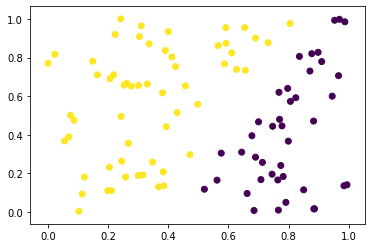

In [3]:
X_train_test_1 = np.concatenate((train_set_1[0], test_set_1[0]))
y_train_test_1 = np.concatenate((train_set_1[1], test_set_1[1]))
plot_example_set(X_train_test_1, y_train_test_1)

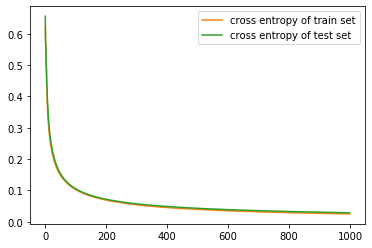

In [4]:
def plot_training(w, learning_rate, iteration_count, X_train, y_train, X_test, y_test):
    """Plots the cross entropy error for both the training and the test set during the given number of 
    training iterations for a logistic regression model.
    
    Arguments:
    w: The initial weights to beginn the training with.
    learning_rate: The learning rate determining how much influence each iteration should have on the weights.
    iteration_count: The number of training iterations.
    X_train: A matrix containing the data points for training (each in one row) with a prepended column
             containing 1 for every row for bias simplification.
    y_train: The desired classification for every data point.
    X_test: A matrix containing the data points for testing (each in one row) with a prepended column
             containing 1 for every row for bias simplification.
    y_test: The classification for every data point.
    
    Returns: A vector containing the learned weights and as first entry the bias of the linear function
             for logistic regression.
    
    """
    
    iterations = range(0, iteration_count)
    ce_err_train = []
    ce_err_test = []
    
    # print(cross_entropy(w, X_train, y_train)) used only for finding the best learning rate.
    
    """training"""
    for i in iterations:
        w = update(w, learning_rate, X_train, y_train)
        ce_err_train.append(cross_entropy(w, X_train, y_train))
        ce_err_test.append(cross_entropy(w, X_test, y_test))
        
        # print(cross_entropy(w, X_train, y_train)) used only for finding the best learning rate.
    
    """plotting"""
    ce_train_plot = plt.plot(iterations, ce_err_train, color = "C1", label = "cross entropy of train set")
    ce_test_plot = plt.plot(iterations, ce_err_test, color = "C2", label = "cross entropy of test set")
    plt.legend()
    plt.show()
    
    return w

w_data_1= plot_training(init_w, 0.1, 1000, train_set_1[0], train_set_1[1], test_set_1[0], test_set_1[1])

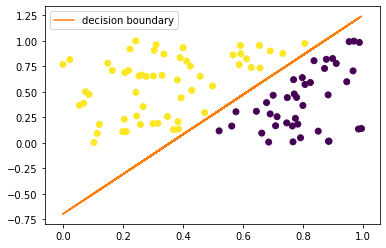

In [5]:
plot_dec_boundary(w_data_1, X_train_test_1, y_train_test_1)

In [6]:
######################################## Task 2.2 ##############################################

train_set_2 = get_data_set('dataset/classification/cl_train_2.csv', 2)
test_set_2 = get_data_set('dataset/classification/cl_test_2.csv', 2)

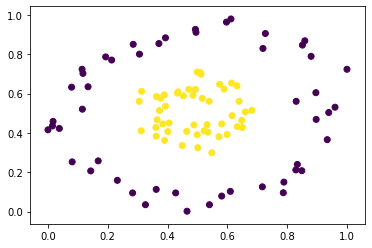

In [7]:
X_train_test_2 = np.concatenate((train_set_2[0], test_set_2[0]))
y_train_test_2 = np.concatenate((train_set_2[1], test_set_2[1]))
plot_example_set(X_train_test_2, y_train_test_2)

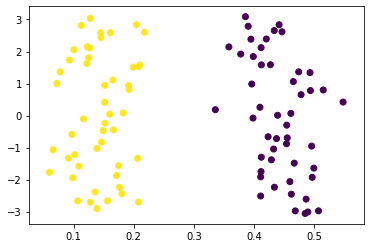

In [8]:
def polar_data(X, pole_x, pole_y):
    """Converts the given data points to their polar representation in relation to the given pole.
    
    Arguments:
    X: The data points in cartesian representation in a matrix (one point per row) with a prepended column
       containing 1 for every row for bias simplification.
    pole_x: The x coordinate of the pole.
    pole_y: The x coordinate of the pole
    
    Returns:
    The data points in polar representation in a matrix (one point per row) with a prepended column containing
    1 for every row for bias simplification."""
    def rho(x1, x2):
        return np.sqrt((x1 - pole_x)**2 + (x2 - pole_y)**2)
    def phi(x1, x2):
        return np.arctan2(x2 - pole_y, x1 - pole_x)
    
    return np.array([np.array([x[0], rho(x[1], x[2]), phi(x[1], x[2])]) for x in X])

X_train_polar = polar_data(train_set_2[0], 0.5, 0.5)
X_test_polar = polar_data(test_set_2[0], 0.5, 0.5)
X_all_polar = np.concatenate((X_train_polar, X_test_polar))

plot_example_set(X_all_polar, y_train_test_2)

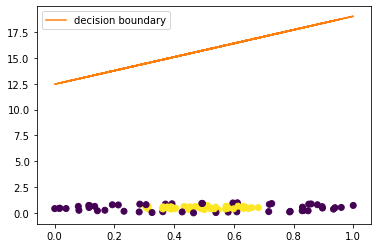

In [9]:
w_data_2 = train(init_w, 0.1, 1000, train_set_2[0], train_set_2[1])
plot_dec_boundary(w_data_2, X_train_test_2, y_train_test_2)

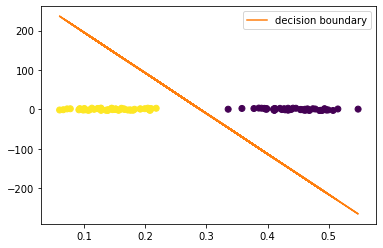

In [10]:
w_polar = train(init_w, 0.1, 1000, X_train_polar, train_set_2[1])
plot_dec_boundary(w_polar, X_all_polar, y_train_test_2)